In [37]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import cv2
import datetime
import pathlib
import io
import os
import time
import random
import albumentations as A

from PIL import Image
from keras.models import Model
from keras_core.layers import (Layer , GlobalAveragePooling2D,Activation,MaxPooling2D,Add,Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization,Input,
                          Embedding,Permute,Dropout,RandomFlip,RandomRotation,LayerNormalization,MultiHeadAttention,
                          RandomContrast,Rescaling,Resizing,Reshape,Cropping2D)

from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy

from keras.metrics import Accuracy,TopKCategoricalAccuracy,CategoricalAccuracy,SparseCategoricalAccuracy
from keras.optimizers import Adam, Adadelta
from keras.callbacks import Callback, CSVLogger,EarlyStopping,LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
from keras.regularizers import L1,L2


import wandb
from wandb.keras import WandbCallback




ValueError: width must be >= target + offset.

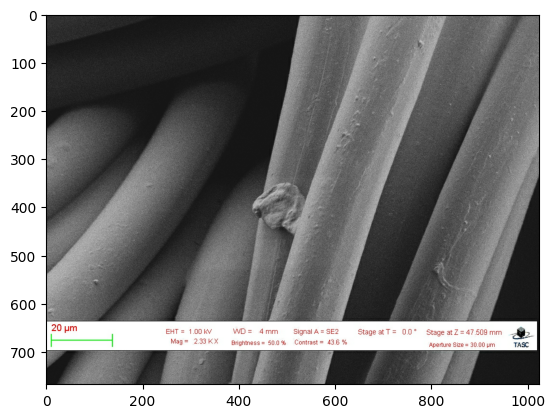

In [38]:
def image_crop_normal():
    image_path = "B:\Dosya\Kodlar\Sem-Images-Classification\data\data100\Fibres\L9_0a95f6c416d2bd7c7675d27602ca1b4b.jpg"
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)  # RGB resim için channels=3
    plt.imshow(image)
    crop_start = [0, 0]  # Yükseklik (height), genişlik (width) sırasıyla
    crop_size = [640, 2000]  # Yükseklik (height), genişlik (width) sırasıyla
    cropped_image = tf.image.crop_to_bounding_box(image, crop_start[0], crop_start[1], crop_size[0], crop_size[1])
    plt.imshow(cropped_image.numpy())
image_crop_normal()

<class 'tensorflow.python.framework.ops.EagerTensor'>


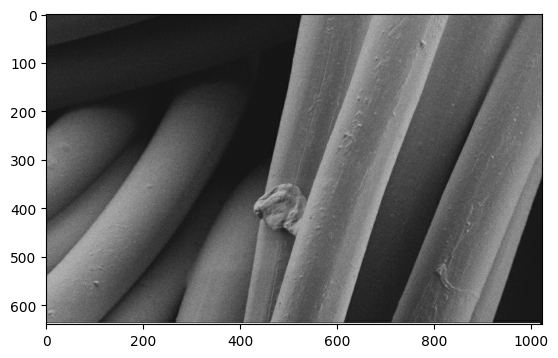

In [39]:
def crop_layer():
    image_path = "B:\Dosya\Kodlar\Sem-Images-Classification\data\data100\Fibres\L9_0a95f6c416d2bd7c7675d27602ca1b4b.jpg"
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.expand_dims(image,0)
    img = Cropping2D(cropping=((0,128),(0,0)))(image)
    print(type(img))
    plt.imshow(tf.squeeze(img,0))
crop_layer()

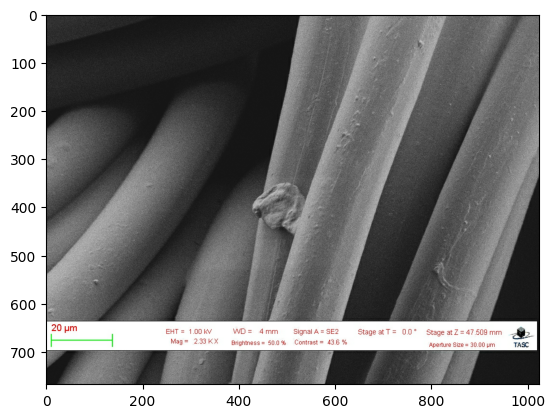

In [44]:
image_path = "B:\Dosya\Kodlar\Sem-Images-Classification\data\data100\Fibres\L9_0a95f6c416d2bd7c7675d27602ca1b4b.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)
plt.imshow(image)


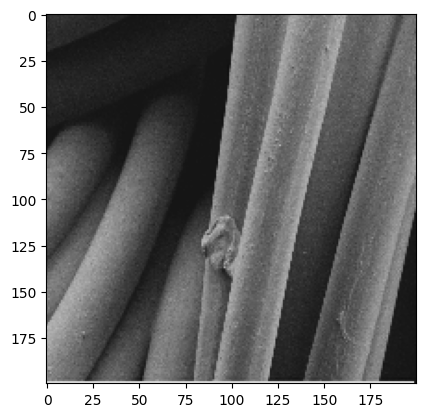

In [45]:
image = tf.expand_dims(image,0)
img = Cropping2D(cropping=((0,128),(0,0)))(image)
img = Resizing(200,200,crop_to_aspect_ratio=False)(tf.squeeze(img,0))
plt.imshow(img)